# Weekends Have the Most Crime Records in San Francisco

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Import the data

In [3]:
sfdat = pd.read_csv("./sanfrancisco_incidents_summer_2014.csv", index_col="Date")

In [4]:
sfdat.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
Date,,,,,,,,,,,,
08/31/2014,140734311,ARSON,ARSON OF A VEHICLE,Sunday,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
08/31/2014,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000


### Number of occurrences per day of week show that the weekend days have more occurrences on average than the weekdays

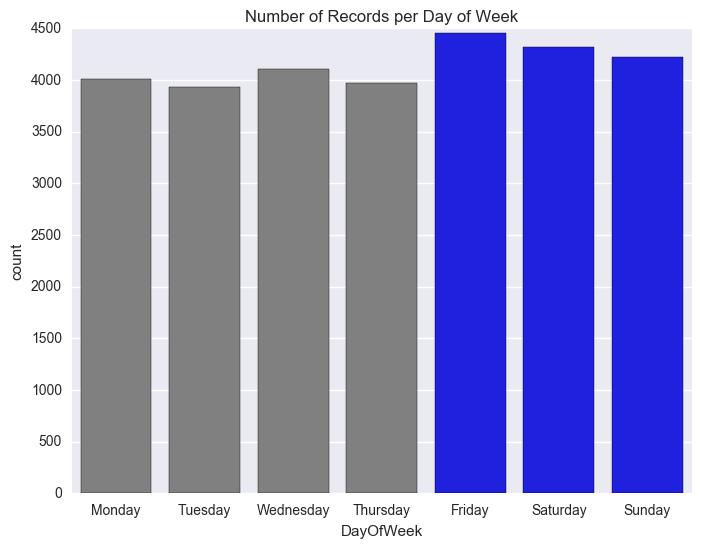

In [5]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
sns.set(font_scale=1)
sns.countplot(sfdat.DayOfWeek, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette = {'Monday':'gray','Tuesday':'gray','Wednesday':'gray','Thursday':'gray','Friday':'blue','Saturday':'blue','Sunday':'blue'}
             )
ax.set_title('Number of Records per Day of Week');

### Looking at the day distribution by district shows that even though the weekend only dominates in half of the districts in terms of crime records percentage, the districts that have the largest amount of records have higher weekend crime activity compared to the weekday and thus drive the higher weekend crime records in the chart above

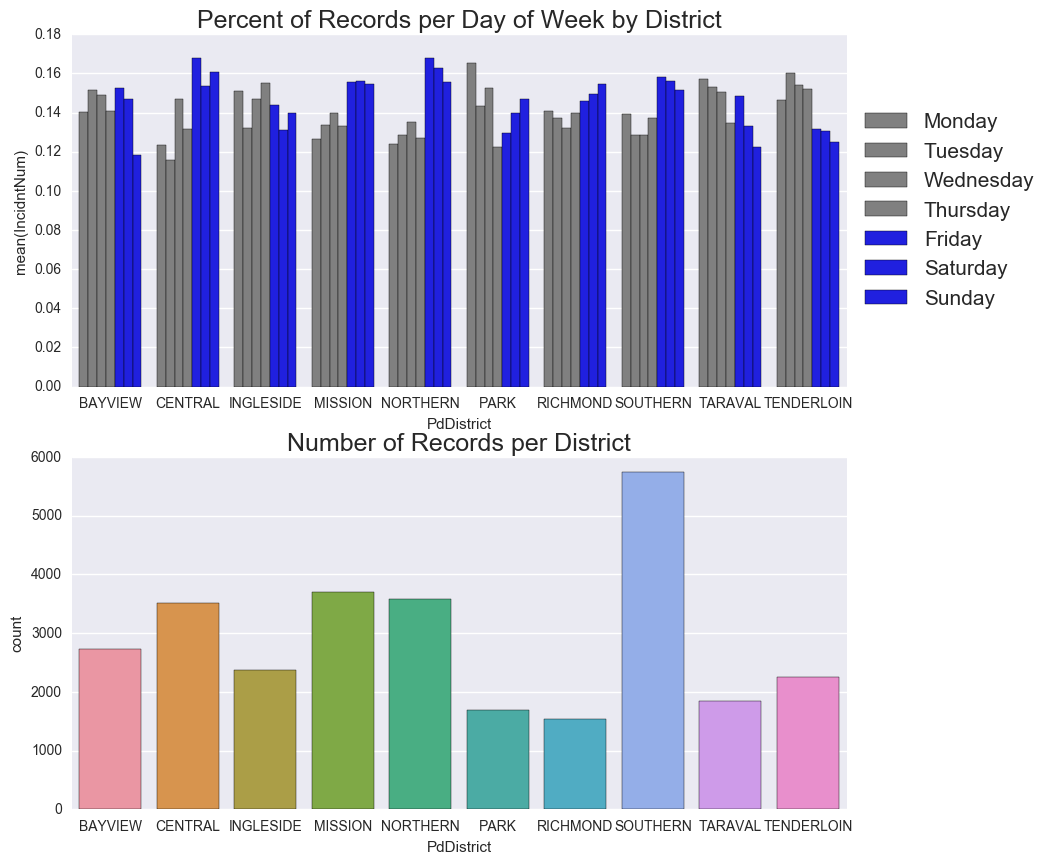

In [6]:
sfdistrictpctg = sfdat.groupby(['PdDistrict', 'DayOfWeek']).IncidntNum.count().groupby(level=[0]).apply(lambda x: x / float(x.sum()))
sfdistrictpctg = sfdistrictpctg.reset_index(drop=False)
# sfdistrictpctg.DayOfWeek = pd.Categorical(sfdistrictpctg.DayOfWeek, categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.set(font_scale=1.5)
g = sns.factorplot(data=sfdistrictpctg, kind="bar", hue="DayOfWeek", y="IncidntNum", x="PdDistrict",
               hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette = {'Monday':'gray','Tuesday':'gray','Wednesday':'gray','Thursday':'gray','Friday':'blue','Saturday':'blue','Sunday':'blue'}
              ,ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_title('Percent of Records per Day of Week by District')


sns.countplot(sfdat.PdDistrict,order=['BAYVIEW', 'CENTRAL','INGLESIDE', 'MISSION', 'NORTHERN', 'PARK','RICHMOND', 'SOUTHERN',  
          'TARAVAL', 'TENDERLOIN'],ax=ax2)
ax2.set_title('Number of Records per District');
plt.close(g.fig)
# .sort_values(ascending = False).groupby(level=[0]).head(1)
# sfdistrictpctgtop.groupby(level=[1]).count()